In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv('blood_pressure_regression_dataset.csv')

In [3]:
df.head()

,Age,Weight,Height,BMI,Exercise_Freq,Systolic_BP
0,56,106,172,35.83,0,166.08
1,69,69,159,27.29,2,155.91
2,46,115,160,44.92,2,167.57
3,32,96,190,26.59,3,143.19
4,60,48,190,13.30,5,133.13


In [4]:
df.shape

(2100, 6)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2100 entries, 0 to 2099
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            2100 non-null   int64  
 1   Weight         2100 non-null   int64  
 2   Height         2100 non-null   int64  
 3   BMI            2100 non-null   float64
 4   Exercise_Freq  2100 non-null   int64  
 5   Systolic_BP    2100 non-null   float64
dtypes: float64(2), int64(4)
memory usage: 98.6 KB


In [6]:
df.describe()

,Age,Weight,Height,BMI,Exercise_Freq,Systolic_BP
count,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000
mean,49.233333,81.341905,174.572857,27.253852,3.011429,150.536748
std,17.944726,21.442596,14.429798,8.644722,2.021057,18.469152
min,18.000000,45.000000,150.000000,11.480000,0.000000,108.220000
25%,34.000000,63.000000,162.000000,20.437500,1.000000,138.177500
50%,50.000000,81.000000,174.000000,26.535000,3.000000,149.230000
75%,65.000000,100.000000,187.000000,32.835000,5.000000,160.435000
max,79.000000,119.000000,199.000000,52.890000,6.000000,240.700000


In [7]:
df.isna().sum()

Age              0
Weight           0
Height           0
BMI              0
Exercise_Freq    0
Systolic_BP      0
dtype: int64

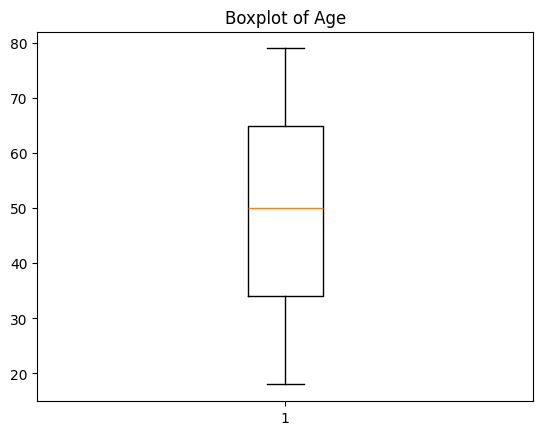

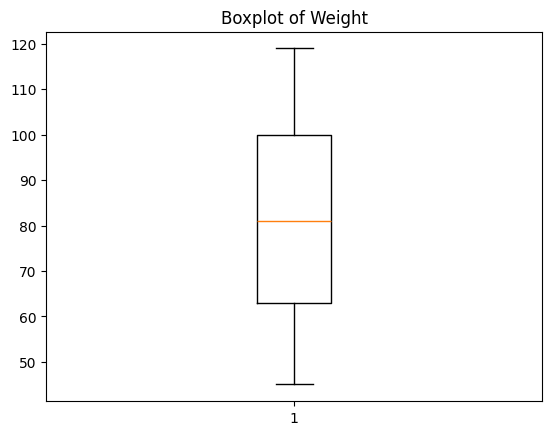

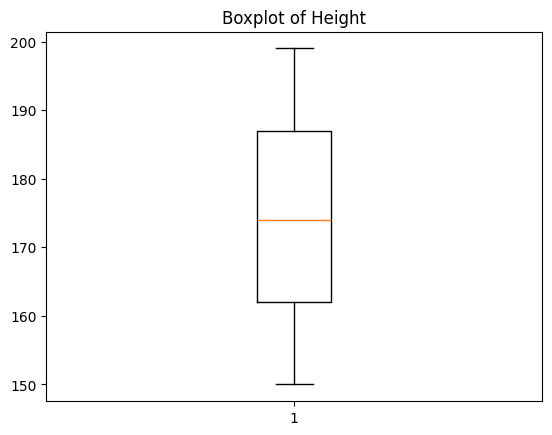

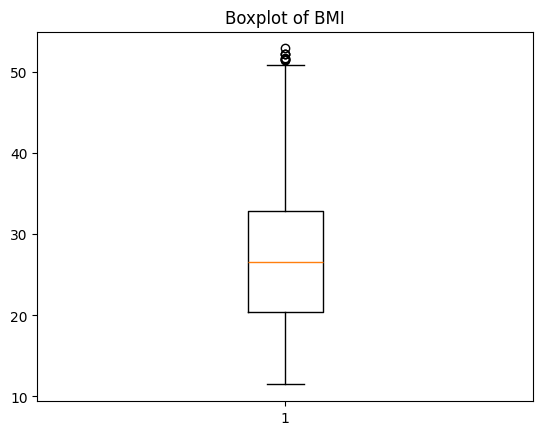

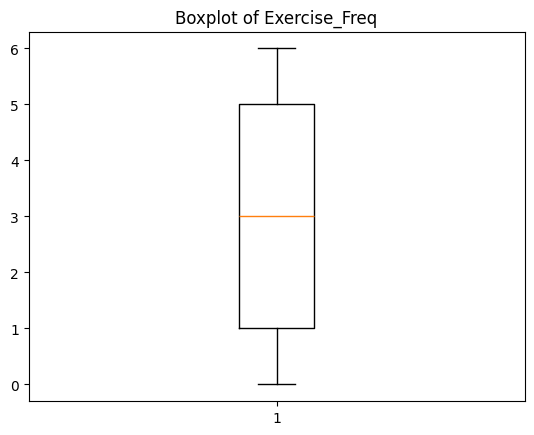

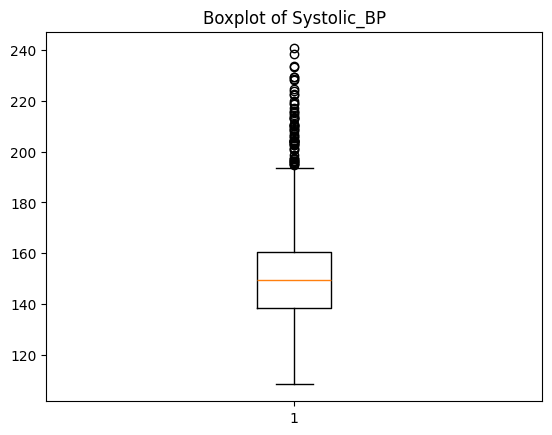

In [8]:
for i in df:
    plt.boxplot(df[i])
    plt.title(f'Boxplot of {i}')
    plt.show()

In [9]:
for col in ['BMI', 'Systolic_BP']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df[col] = df[col].clip(lower, upper)

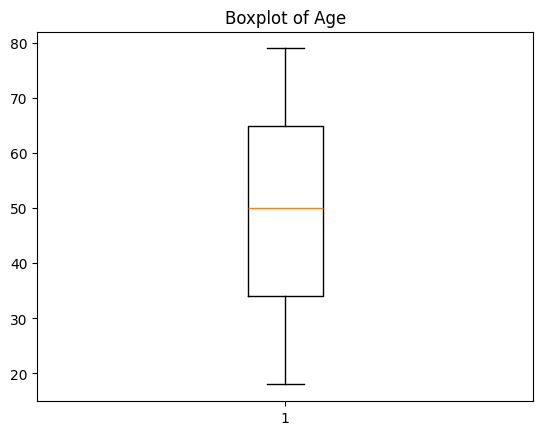

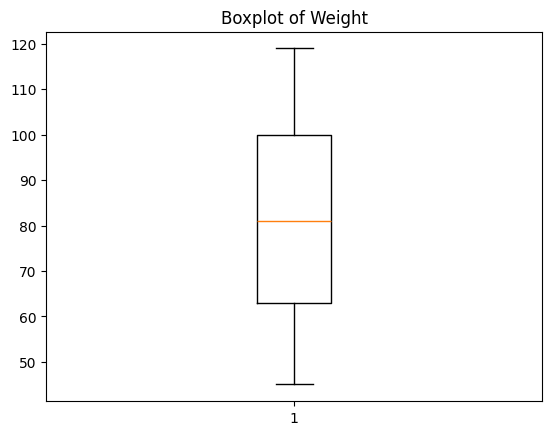

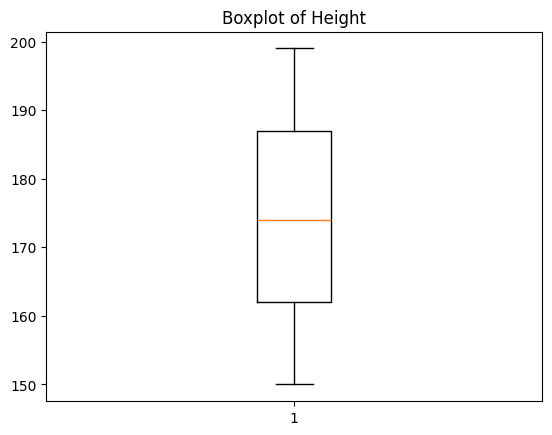

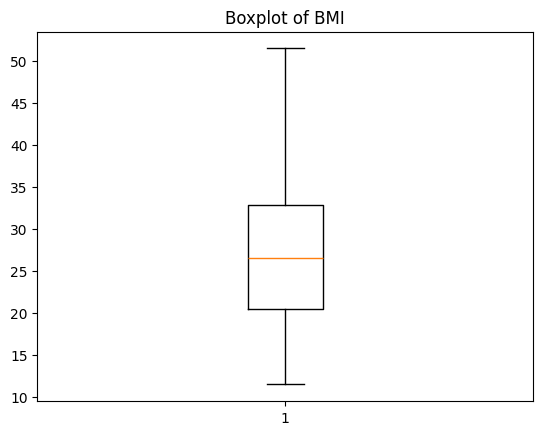

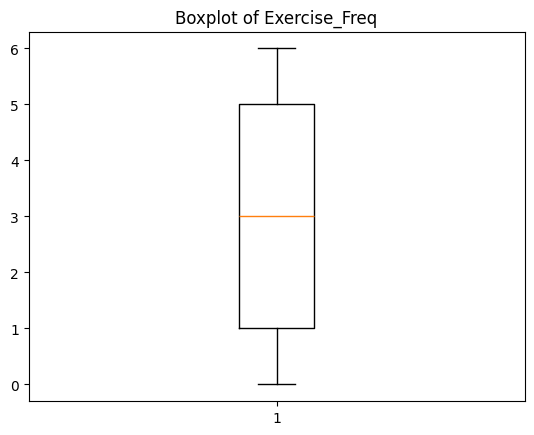

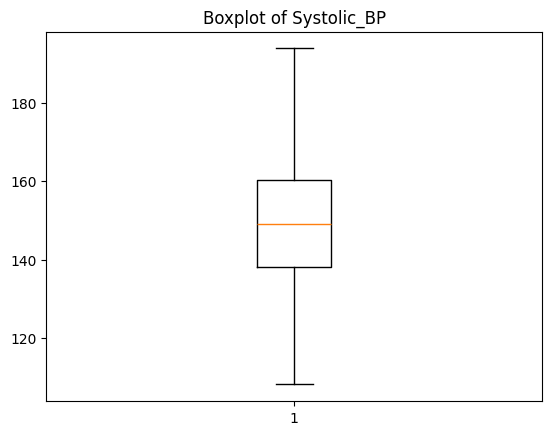

In [10]:
for i in df:
    plt.boxplot(df[i])
    plt.title(f'Boxplot of {i}')
    plt.show()

In [11]:
df.head()

,Age,Weight,Height,BMI,Exercise_Freq,Systolic_BP
0,56,106,172,35.83,0,166.08
1,69,69,159,27.29,2,155.91
2,46,115,160,44.92,2,167.57
3,32,96,190,26.59,3,143.19
4,60,48,190,13.30,5,133.13


In [12]:
X=df.drop(columns=['Systolic_BP'])
y=df['Systolic_BP']

In [13]:
minmax=MinMaxScaler()
X_scaled=minmax.fit_transform(X)

Data Splitting

In [14]:
X_train,X_test,y_train,y_test=train_test_split(X_scaled, y, test_size=0.3)

Model training (Linear Regression)

In [15]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [16]:
model.coef_ # m in y=mx+c

array([29.20409793,  8.47486624,  4.89306056, 40.89950117, -8.294818  ])

In [17]:
model.intercept_ # c in y=mx+c 

np.float64(116.65752813253235)

In [18]:
y_pred=model.predict(X_test)

In [19]:
y_pred

array([159.64101889, 149.11830251, 148.68185233, 175.60015239,
       151.31845247, 145.08269657, 143.09477053, 151.02341943,
       135.84448967, 177.01271667, 152.40400153, 145.50120621,
       179.38976954, 142.94556957, 121.46048455, 149.25719764,
       166.41317858, 146.93737878, 165.53096255, 156.461375  ,
       177.98836596, 139.60441485, 141.8103869 , 137.76721874,
       168.80754646, 166.98969269, 131.79137454, 129.44993554,
       151.01425956, 145.21231414, 177.2469975 , 152.50232317,
       127.52116636, 173.45499226, 159.33287528, 186.0733166 ,
       164.64881663, 128.94077866, 164.33938145, 159.13872846,
       126.31240256, 156.01290743, 142.74842316, 164.43729413,
       168.01133306, 142.01375262, 157.50079402, 154.93299423,
       157.37118769, 137.35416162, 165.18675923, 129.76473314,
       136.22116595, 147.78430544, 173.64047498, 160.1979455 ,
       151.62313943, 150.11041094, 169.82059024, 132.92365651,
       151.7670495 , 134.04636135, 169.0987503 , 174.70

In [20]:
y_test.values

array([163.47   , 144.3    , 150.81   , 178.14   , 149.28   , 141.45   ,
       173.08   , 157.65   , 135.05   , 178.34   , 149.24   , 146.9    ,
       177.62   , 136.99   , 114.32   , 147.44   , 169.89   , 135.03   ,
       164.08   , 160.7    , 172.1    , 141.81   , 138.19   , 136.13   ,
       170.2    , 166.01   , 132.35   , 193.82125, 150.45   , 193.82125,
       177.08   , 151.61   , 128.61   , 173.61   , 155.65   , 183.36   ,
       159.77   , 125.94   , 149.7    , 164.26   , 116.93   , 155.52   ,
       142.81   , 164.7    , 171.48   , 150.9    , 161.8    , 151.32   ,
       152.42   , 134.45   , 160.5    , 123.71   , 130.38   , 143.63   ,
       176.72   , 159.91   , 193.82125, 149.25   , 168.74   , 137.62   ,
       149.52   , 134.3    , 163.15   , 170.7    , 139.88   , 170.78   ,
       137.3    , 131.05   , 113.18   , 154.94   , 151.84   , 152.68   ,
       140.57   , 141.67   , 151.68   , 164.69   , 157.89   , 134.73   ,
       133.42   , 133.29   , 129.7    , 129.78   , 

Evaluation

In [21]:
from sklearn.metrics import mean_absolute_error, root_mean_squared_error, mean_squared_error, r2_score

In [22]:
print("R Squared Value:", r2_score(y_test,y_pred))
print("Mean Absolute Error:", mean_absolute_error(y_test,y_pred))
print("Root Mean Squared Error:", root_mean_squared_error(y_test,y_pred))
print("Mean Squared Error:", mean_squared_error(y_test,y_pred))

R Squared Value: 0.6969853787017625
Mean Absolute Error: 5.758127068423489
Root Mean Squared Error: 9.620950415319475
Mean Squared Error: 92.56268689403599


Other Regression Models

In [23]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

models=[KNeighborsRegressor(),SVR(), DecisionTreeRegressor(), RandomForestRegressor(), GradientBoostingRegressor()]

for model in models:
    model.fit(X_train, y_train)
    y_pred=model.predict(X_test)
    print(model)
    print("_"*27)
    print("R Squared Value:", r2_score(y_test,y_pred))
    print("Mean Absolute Error:", mean_absolute_error(y_test,y_pred))
    print("Root Mean Squared Error:", root_mean_squared_error(y_test,y_pred))   
    print("Mean Squared Error:", mean_squared_error(y_test,y_pred))
    print('\n')
    

KNeighborsRegressor()
___________________________
R Squared Value: 0.6362321902748989
Mean Absolute Error: 6.650666269841269
Root Mean Squared Error: 10.541400564912637
Mean Squared Error: 111.12112586994047


SVR()
___________________________
R Squared Value: 0.6692508846483882
Mean Absolute Error: 6.048514894958417
Root Mean Squared Error: 10.051607681301995
Mean Squared Error: 101.03481697880926


DecisionTreeRegressor()
___________________________
R Squared Value: 0.24686894668087378
Mean Absolute Error: 9.832275793650794
Root Mean Squared Error: 15.16776046054238
Mean Squared Error: 230.0609573883928


RandomForestRegressor()
___________________________
R Squared Value: 0.6440220852918748
Mean Absolute Error: 6.693491349206364
Root Mean Squared Error: 10.427920492701976
Mean Squared Error: 108.7415258021138


GradientBoostingRegressor()
___________________________
R Squared Value: 0.6761869654068975
Mean Absolute Error: 6.223536198363216
Root Mean Squared Error: 9.945654017527573


The best model pick for this case is  - Linear regression

Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(LinearRegression(), X_scaled,y,cv=5).mean())

0.6590842254343346


To Test the model

In [ ]:
X.sample(1)  # pull a sample data from X containing features

,Age,Weight,Height,BMI,Exercise_Freq
2024,19,50,184,14.77,0


In [ ]:
test_data=[[25,62,169,21,3]]  # provide a sample data matching the features, into a 2D variable to test the model
test=minmax.transform(test_data) # Need to scale the test_data since the original model was trained on scaled data

C:\Users\ajayk\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [30]:
model.predict(test)

array([130.32598003])

Deployment

In [31]:
data={'model':model, 'scaler': minmax, 'features':list(X.columns)}

In [32]:
import pickle
with open('bp_prediction.pkl','wb') as obj1:
    pickle.dump(data,obj1)

In [1]:
with open('bp_prediction.pkl','rb') as obj1:
    a=pickle.load(obj1)

NameError: name 'pickle' is not defined